In [ ]:
#Importing: (You can add or change this)
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Objectives:
- Let them be able to choose which country
- Average AQI for all the cities in the country
- Mean AQI (What city?)
- Highest AQI (What city?)
- Lowest AQI (What city?)
- add articles to add context of why the results are like that
- Some graphs to explain it
- Add engagement questions

# 1. Preparation

In [ ]:
dataset = files.upload()

Saving global air pollution dataset.csv to global air pollution dataset.csv


In [ ]:
pollute = pd.read_csv("global air pollution dataset.csv")

In [ ]:
pollute.head(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups


#### displays the raw data of the AQI in each Country and their major cities

# 2. AQI Data Summary

In [ ]:
pollute['AQI Value'].describe()

count    23463.000000
mean        72.010868
std         56.055220
min          6.000000
25%         39.000000
50%         55.000000
75%         79.000000
max        500.000000
Name: AQI Value, dtype: float64

#### mean AQI value for each country and the country with the most average AQI value

In [ ]:
# Calculate the mean AQI for each country
mean_aqi_by_country = pollute.groupby('Country')['AQI Value'].mean()
mean_aqi = np.mean(pollute['AQI Value'])

# Find the country with the closest mean AQI to the overall mean
closest_country = np.argmin(np.abs(mean_aqi_by_country - mean_aqi))

# Print the country with the closest mean AQI
print(f"Country with closest mean AQI: {mean_aqi_by_country.index[closest_country]} (Mean AQI: {mean_aqi_by_country.values[closest_country]})")


Country with closest mean AQI: Lebanon (Mean AQI: 72.0)


#### mean AQI value for each country and the city with the most average AQI value

In [ ]:
# Calculate the mean AQI
mean_aqi = np.mean(pollute['AQI Value'])

# Find the city with the closest AQI to the mean
closest_aqi = np.argmin(np.abs(pollute['AQI Value'] - mean_aqi))

# Print the mean AQI and the city with the closest AQI
print(f"Mean AQI: {mean_aqi}")
print(f"City with closest AQI: {pollute['City'][closest_aqi]} (AQI: {pollute['AQI Value'][closest_aqi]})")

Mean AQI: 72.01086817542513
City with closest AQI: Phoenix (AQI: 72)


#### the country with the highest AQI value

In [ ]:
# Calculate the mean AQI for each country
mean_aqi_by_country = pollute.groupby('Country')['AQI Value'].mean()

# Find the country with the highest mean AQI
max_mean_aqi_country = mean_aqi_by_country.idxmax()
max_mean_aqi_value = mean_aqi_by_country.loc[max_mean_aqi_country]

# Print the country with the highest mean AQI and its average AQI
#print(f"Country with highest average AQI: {max_mean_aqi_country} (Average AQI: {max_mean_aqi_value})")


Country with highest average AQI: Republic of Korea (Average AQI: 421.0)


Why does Korea have an abnormal pollution level?:

- in the data set there is only one major city that represents Korea
- Seoul, the capital of Korea, is a dense and highly populated area
- residents may live 1.7 years less if the city's high pollution levels persist

#### the city with the highest AQI value

In [ ]:
# Calculate the highest AQI
highest_AQI_city = pollute.groupby('City')['AQI Value'].mean().sort_values(ascending=False).head(1).index[0]
highest_AQI = pollute[pollute['City'] == highest_AQI_city]['AQI Value'].max()

print(f"The AQI of the city with the highest AQI is {highest_AQI_city }: {highest_AQI}.")

The AQI of the city with the highest AQI is Puranpur: 500.


#### the country with the lowest AQI value

In [ ]:
# Calculate the mean AQI for each country
mean_aqi_by_country = pollute.groupby('Country')['AQI Value'].mean()

# Find the country with the lowest mean AQI
min_mean_aqi_country = mean_aqi_by_country.idxmin()
min_mean_aqi_value = mean_aqi_by_country.loc[min_mean_aqi_country]

# Print the country with the lowest mean AQI and its average AQI
print(f"Country with the lowest average AQI: {min_mean_aqi_country} (Average AQI: {min_mean_aqi_value})")


Country with the lowest average AQI: Palau (Average AQI: 16.0)


#### the city with the lowest AQI value

In [ ]:
# Calculate the lowest AQI
lowest_AQI_city = pollute.groupby('City')['AQI Value'].mean().sort_values(ascending=True).head(1).index[0]
lowest_AQI = pollute[pollute['City'] == lowest_AQI_city]['AQI Value'].min()

print(f"The AQI of the city with the lowest AQI is {lowest_AQI_city}: {lowest_AQI}.")

The AQI of the city with the lowest AQI is El Torno: 6.


# 3. AQI Data Heat Map

In [ ]:
import plotly.express as px

# Get average AQI values per country
pollute_country = pollute.groupby("Country")["AQI Value"].mean().reset_index()

# Create heatmap with index
fig = px.choropleth(pollute_country, locations="Country", locationmode="country names",
                    color="AQI Value", hover_name="Country",
                    color_continuous_scale="Turbo",
                    title="Average Air Quality Index by Country")

fig.show()

In [ ]:
#ask for highest country
print("Make sure you use the same name as the country when you hover over the map.")
answer = input("What country has the highest AQI score? ").lower()
if answer = min_mean_aqi_country.lower():
  print("Correct!")
else:
  print("Hint: try to look for the reddest country on the map. ")
  answer = input("What country has the highest AQI score? ").lower()
  if answer = min_mean_aqi_country.lower():
    print("Correct!")
  else:
    print("The correct answer was the Republic of Korea with an AQI of 421.")

In [ ]:
def display_stat(country):
  pollute_country = pollute[pollute['Country'] == country]

  # Calculate the mean AQI
  mean_aqi = np.mean(pollute_country['AQI Value'])

  # Find the city with the closest AQI to the mean
  closest_aqi = np.argmin(np.abs(pollute_country['AQI Value'] - mean_aqi))

  # Print the mean AQI and the city with the closest AQI
  print(f"Mean AQI for {country}: {mean_aqi}")

  highest_AQI_city = pollute_country.groupby('City')['AQI Value'].mean().sort_values(ascending=False).head(1).index[0]
  highest_AQI = pollute_country[pollute_country['City'] == highest_AQI_city]['AQI Value'].max()

  print(f"The AQI of the city with the highest AQI is {highest_AQI_city}: {highest_AQI}.")

  lowest_AQI_city = pollute_country.groupby('City')['AQI Value'].mean().sort_values(ascending=True).head(1).index[0]
  lowest_AQI = pollute_country[pollute_country['City'] == lowest_AQI_city]['AQI Value'].min()

  print(f"The AQI of the city with the lowest AQI is {lowest_AQI_city}: {lowest_AQI}.")


country = input("What country would you like to check the AQI of? ")
display_stat(country)

# 4. Interactive AQI Data App

In [ ]:
def display_stat(country):
  pollute_country = pollute[pollute['Country'] == country]

  # Calculate the mean AQI
  mean_aqi = np.mean(pollute_country['AQI Value'])

  # Find the city with the closest AQI to the mean
  closest_aqi = np.argmin(np.abs(pollute_country['AQI Value'] - mean_aqi))

  # Print the mean AQI and the city with the closest AQI
  print(f"Mean AQI for {country}: {mean_aqi}")

  highest_AQI_city = pollute_country.groupby('City')['AQI Value'].mean().sort_values(ascending=False).head(1).index[0]
  highest_AQI = pollute_country[pollute_country['City'] == highest_AQI_city]['AQI Value'].max()

  print(f"The AQI of the city with the highest AQI is {highest_AQI_city}: {highest_AQI}.")

  lowest_AQI_city = pollute_country.groupby('City')['AQI Value'].mean().sort_values(ascending=True).head(1).index[0]
  lowest_AQI = pollute_country[pollute_country['City'] == lowest_AQI_city]['AQI Value'].min()

  print(f"The AQI of the city with the lowest AQI is {lowest_AQI_city}: {lowest_AQI}.")


In [ ]:
country = input("What country would you like to check the AQI of? ")
display_stat(country)

What country would you like to check the AQI of? Brazil
Mean AQI for Brazil: 44.57490396927017
The AQI of the city with the highest AQI is Duque De Caxias: 268.
The AQI of the city with the lowest AQI is Tarauaca: 11.


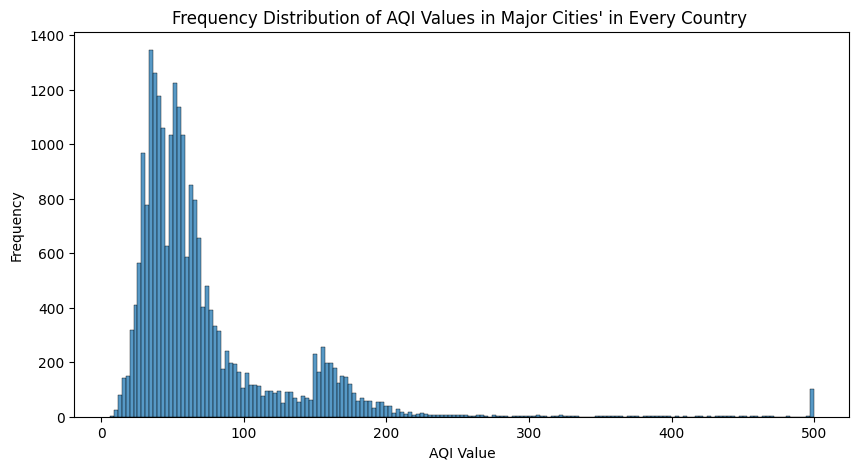

In [ ]:
pollute_country = pollute[pollute['Country'] == country]

#add label and title

fig = plt.figure(
  figsize = (10, 5)
)

hist = sns.histplot(
  data = pollute,
  x = "AQI Value"
)

plt.title(f"Frequency Distribution of AQI Values in Major Cities' in Every Country ")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
### code for corelation of chemical emissions and aqi value

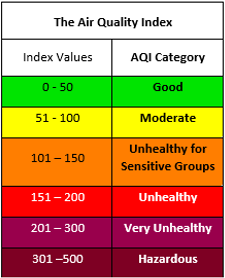